In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [6]:
df = pd.read_csv('/Users/adrienberard/Documents/GitHub/InternshipKU/PeptideStats.tsv', sep='\t')

In [7]:
df.head()

,Systematic_ID,Mass (kDa),pI,Charge,Residues,CAI
0,SPAC1002.01,20.24,10.77,14.90,179,0.57
1,SPAC1002.02,25.84,10.44,10.19,229,0.59
2,SPAC1002.03c,106.28,5.92,-18.68,923,0.55
3,SPAC1002.04c,22.54,8.83,1.96,199,0.53
4,SPAC1002.05c,82.88,6.75,-2.77,715,0.63


In [8]:
# Calculate basic statistics on the DataFrame
df.describe()


,Mass (kDa),pI,Charge,Residues,CAI
count,5138.000000,5138.000000,5138.000000,5138.000000,5138.000000
mean,52.407011,7.376868,-0.271170,464.664656,0.572240
std,41.977384,2.069827,15.551382,371.535675,0.052523
min,2.930000,3.360000,-169.900000,24.000000,0.180000
25%,25.312500,5.580000,-7.047500,223.000000,0.550000
50%,42.720000,7.150000,0.515000,378.000000,0.580000
75%,65.512500,9.150000,8.250000,583.000000,0.610000
max,559.840000,13.110000,69.320000,4924.000000,0.700000


In [15]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X, y = df[['Mass (kDa)', 'pI', 'Charge', 'Residues']], df['CAI']
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

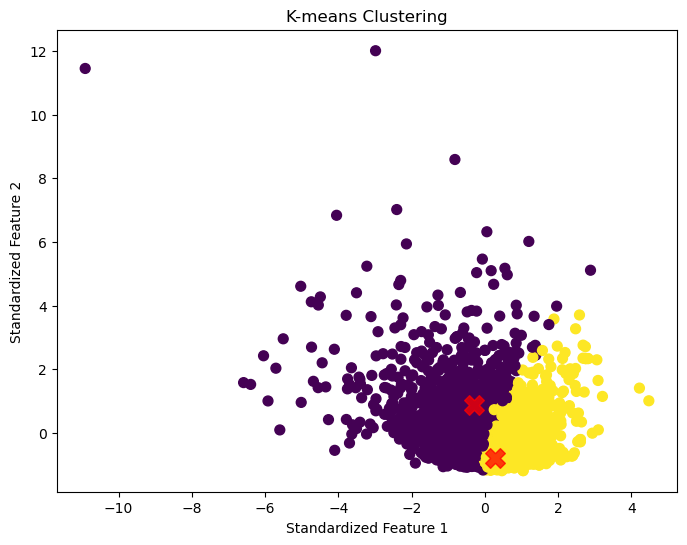

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming you have already loaded your dataset into a DataFrame called 'df'

# Extracting features and target variable
X, y = df[['Mass (kDa)', 'pI', 'Charge', 'Residues']], df['CAI']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42)

# Perform K-means clustering
n_clusters = 2  # You can adjust this number based on your preference
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X_train)
y_train_kmeans = kmeans.predict(X_train)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 2], X_train[:, 3], c=y_train_kmeans, s=50, cmap='viridis')

# Plot the centroids of the clusters
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('K-means Clustering')
plt.xlabel('Standardized Feature 1')
plt.ylabel('Standardized Feature 2')
plt.show()
